Importando librerias y datos

In [ ]:
import pandas as pd

In [ ]:
datos_inmuebles = pd.read_csv("Inmuebles_Final.csv")
datos_inmuebles.head()

# Regresión Lineal

## Correlación

*  Correlación: grado de relación entre variables. Esta relación puede ser positiva o negativa.


In [35]:
correlacion = datos_inmuebles.corr(numeric_only= True)
correlacion

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
tax_condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
bedrooms,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


In [36]:
import seaborn as sns 
import matplotlib.pyplot as plt

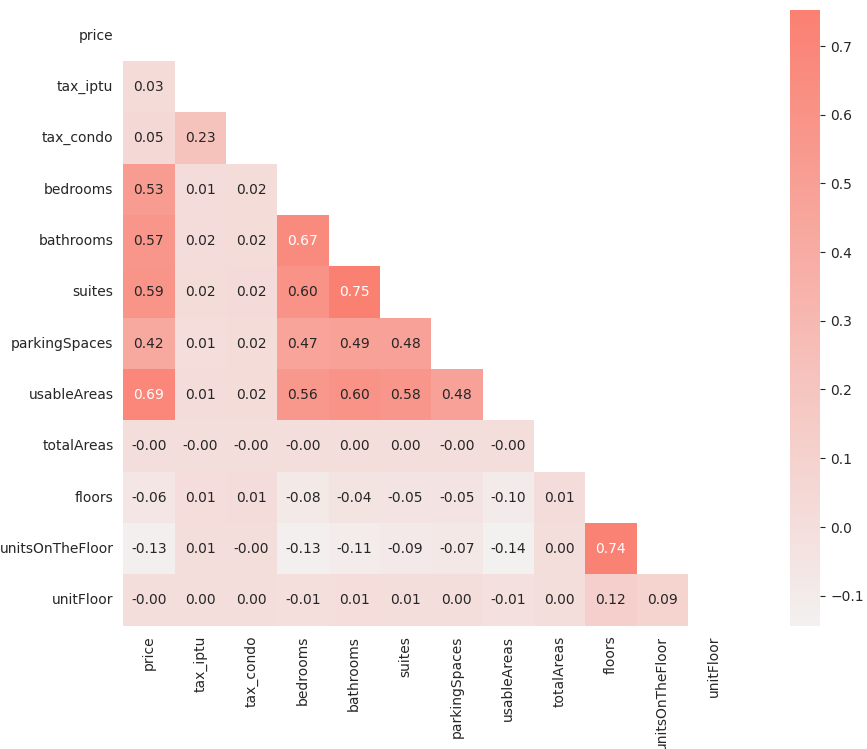

In [37]:
cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlacion)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacion, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

Análisis de la distribución de la variable respuesta.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


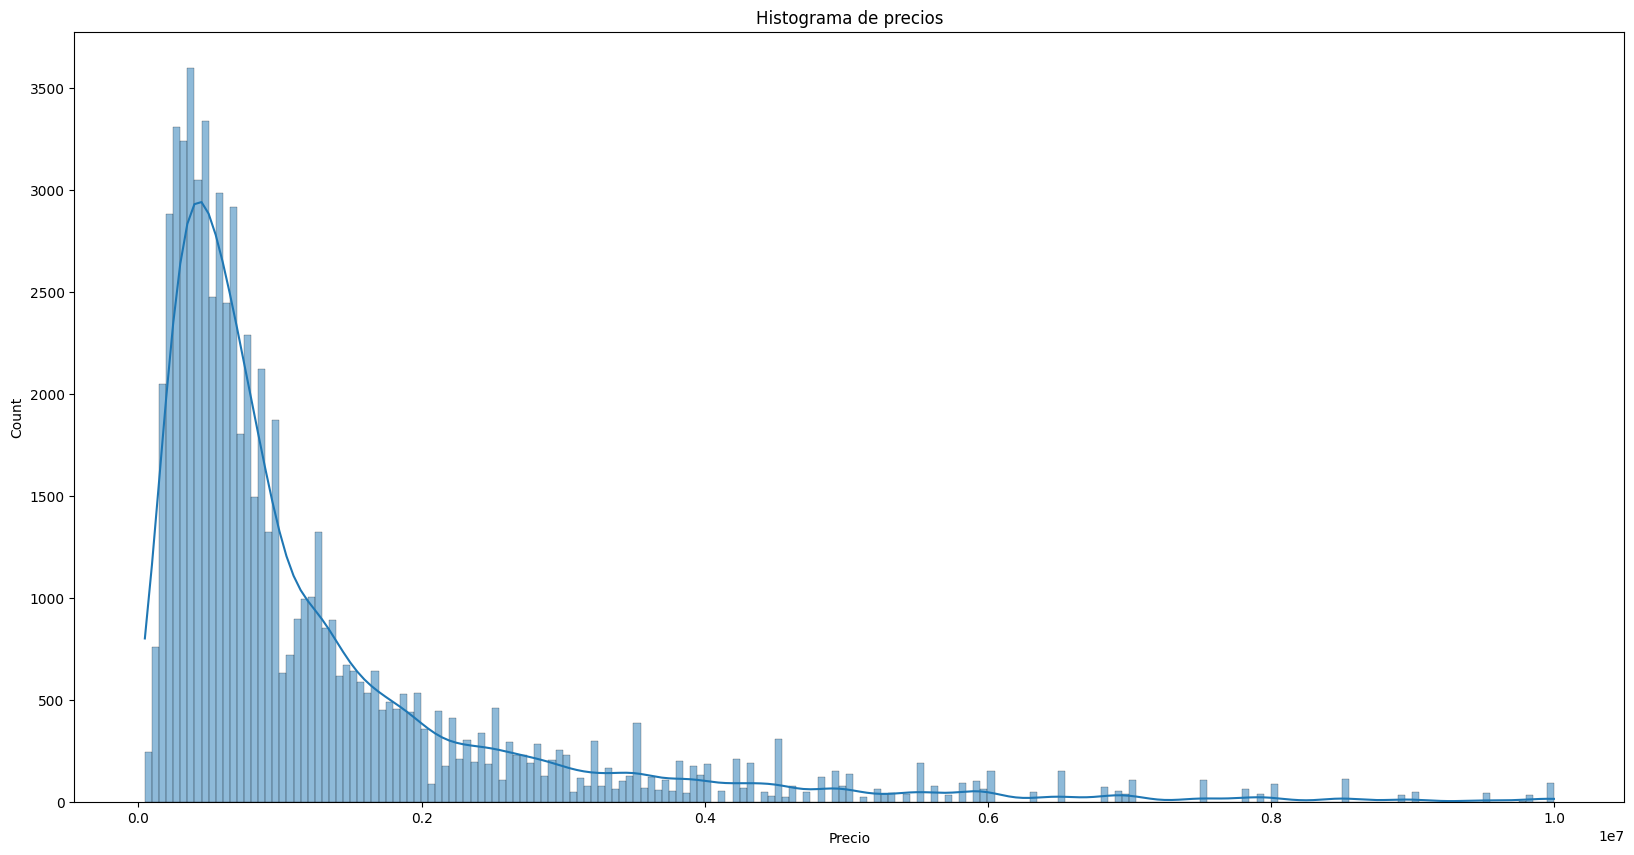

In [44]:
ax = sns.histplot(data=datos_inmuebles, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de precios')
ax.set_xlabel('Precio');

### Transformación de las variables

Estamos realizando una transformación logarítmica de las variables para obtener una distribución simétrica (más cercana a la normal), por lo que podemos usar el modelo de regresión lineal. La transformación realizada es:


$$log1p = log(1+x)$$



In [45]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
datos_transformados = transformer.transform(datos_inmuebles.select_dtypes(exclude=["object"]))

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [47]:
columnas_datos_tranformados = datos_inmuebles.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([datos_inmuebles.select_dtypes(include=['object']), pd.DataFrame(datos_transformados, columns=columnas_datos_tranformados)], axis=1)
df_transformado.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


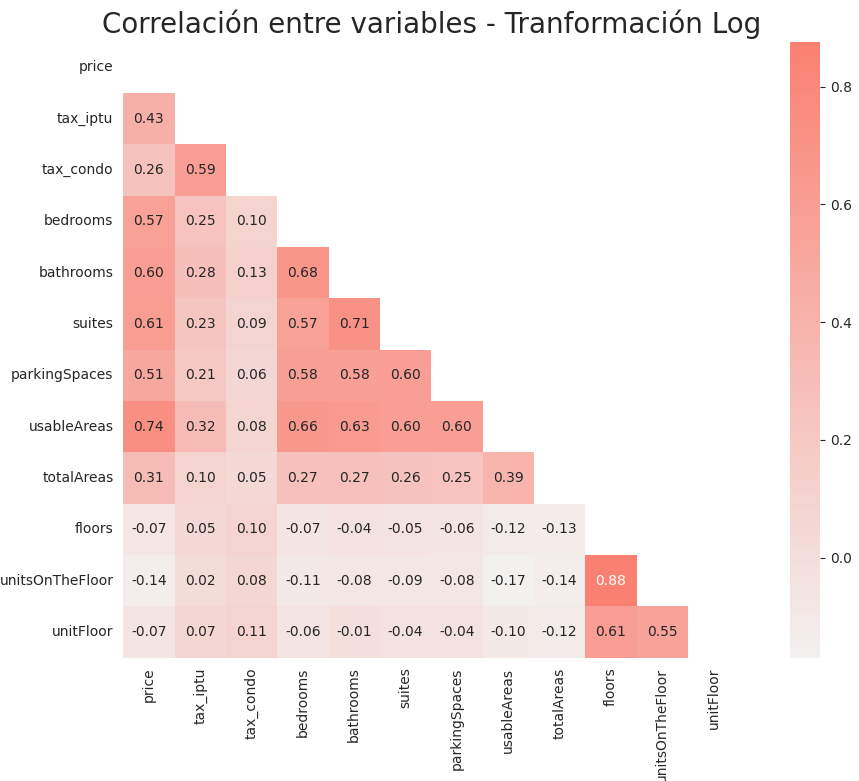

In [49]:
#despues de la transformación
correlacion_transformada = df_transformado.corr(numeric_only= True)
mask = np.zeros_like(correlacion_transformada)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacion_transformada, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlación entre variables - Tranformación Log', fontsize=20)

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


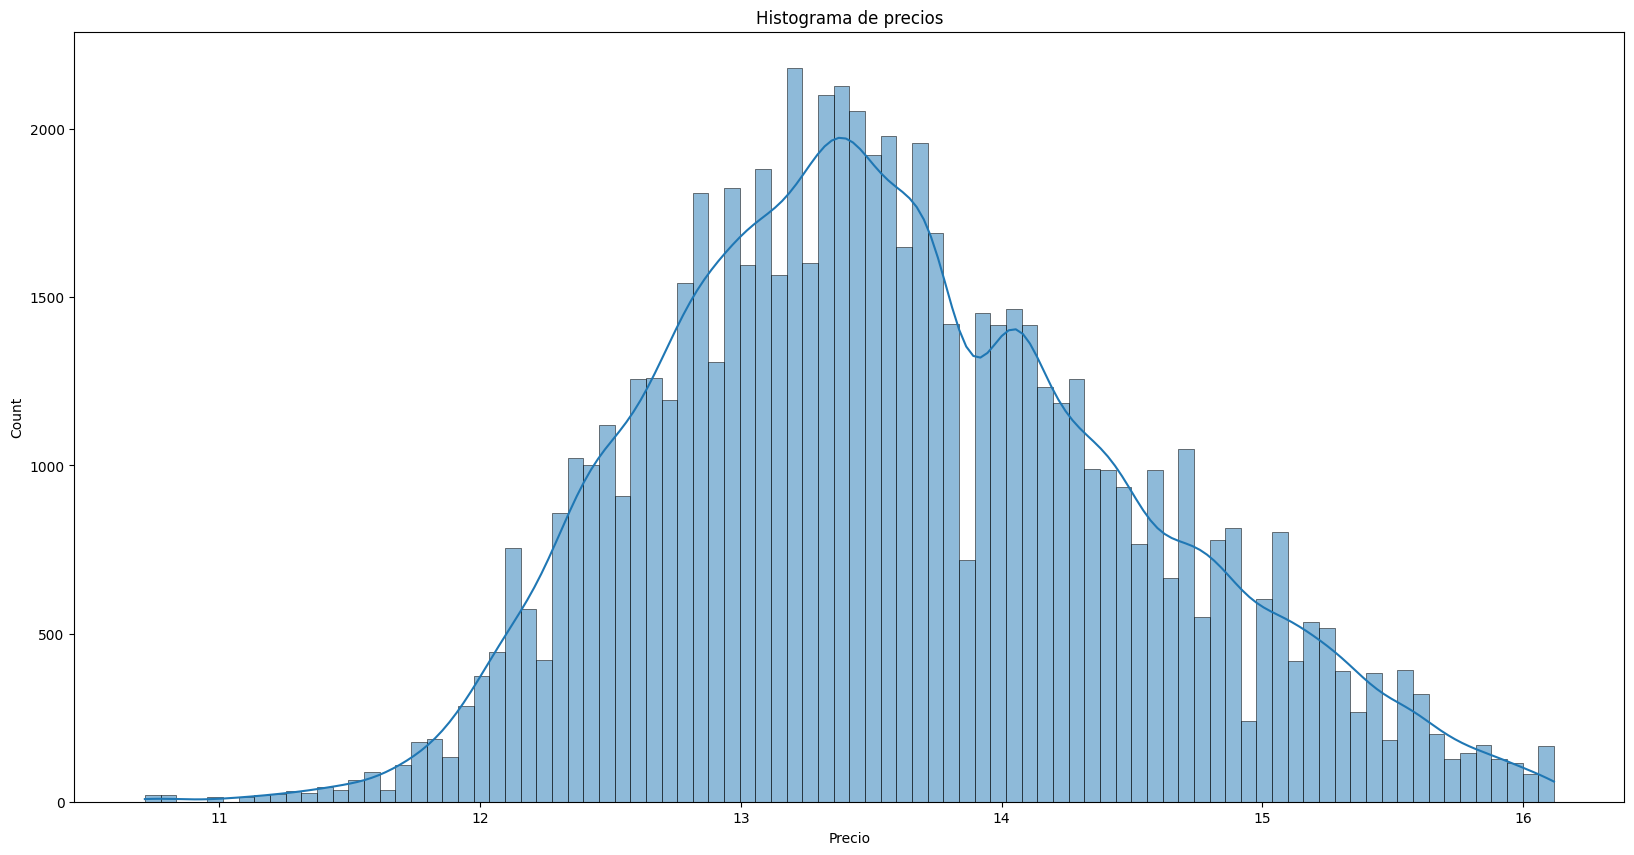

In [50]:
#después (distribución simétrica)
ax = sns.histplot(data=df_transformado, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de precios')
ax.set_xlabel('Precio');

# Dummies

In [52]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [80]:
categoricas = df_transformado.select_dtypes(include=["object"]).columns
datos_inmuebles_dummies = encoder.fit_transform(df_transformado[categoricas])
datos_inmuebles_dummies = pd.DataFrame(datos_inmuebles_dummies.toarray(), columns= np.concatenate(encoder.categories_))


In [82]:
datos_inmuebles_dummies = pd.concat([datos_inmuebles_dummies, df_transformado.select_dtypes(exclude=["object"])], axis=1)
datos_inmuebles_dummies


,Apartamento,Casa,Outros,Zona Central,Zona Norte,Zona Oeste,Zona Sul,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69583,0.0,1.0,0.0,0.0,0.0,1.0,0.0,16.118096,7.972811,7.762596,1.791759,2.397895,0.693147,1.609438,6.932448,6.932448,0.000000,0.000000,0.000000
69584,0.0,1.0,0.0,0.0,0.0,1.0,0.0,16.118096,9.615872,8.006701,1.791759,2.079442,1.791759,1.945910,6.621406,7.131699,0.000000,0.000000,0.000000
69585,1.0,0.0,0.0,0.0,0.0,0.0,1.0,16.118096,0.000000,0.000000,1.609438,1.791759,1.609438,1.386294,5.796058,5.796058,0.000000,0.000000,0.000000
69586,0.0,1.0,0.0,0.0,0.0,1.0,0.0,16.118096,10.463132,7.783641,1.791759,2.397895,1.791759,1.609438,6.932448,6.932448,0.000000,0.000000,1.386294


## Regresión Lineal

* "El análisis de regresión se refiere al estudio de la dependencia de una variable, la variable dependiente, en relación con una o más variables, las variables explicativas, con el objetivo de estimar y/o predecir el valor medio (de la población) de la primera en términos de los valores conocidos o fijados (en muestreos repetidos) de estos últimos”.


## Ajuste y Predicción

### División de los datos

In [83]:
#variables independientes
X = datos_inmuebles_dummies.drop('price', axis=1)

#variable dependiente
y = datos_inmuebles_dummies['price']

In [84]:
from sklearn.model_selection import train_test_split 

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelo

In [86]:
from sklearn.linear_model import LinearRegression

In [89]:
lr = LinearRegression()

In [90]:
lr.fit(X_train, y_train)

LinearRegression()

In [91]:
prediccion_lr = lr.predict(X_test)

In [92]:
prediccion_lr

array([13.25495911, 12.45452881, 12.91690063, ..., 13.13105011,
       12.42333603, 14.49969864])

In [94]:
np.expm1(13.25495911)

570893.1586082873

## 2.4 - Métrica de desempeño

### Coeficiente de Determinación

* averiguar qué tan “bien” se ajusta una línea de regresión muestral a los datos
* r2 se encuentra entre 0 y 1
* "r2 mide la proporción o porcentaje de la variación total de Y explicada por el modelo de regresión".





In [95]:
from sklearn.metrics import r2_score

In [99]:
r2_lr = r2_score(y_test, prediccion_lr)
r2_lr

0.7880476892734278